In [2]:
import pandas as pd

In [6]:
df = pd.read_csv(r"C:\Users\aisya\Downloads\data_R35.csv", delimiter = ';')

In [7]:
df

,Unnamed: 0,ClNr,LoB,cc,AY,AQ,age,inj_part,RepDel,Pay00,...,Pay02,Pay03,Pay04,Pay05,Pay06,Pay07,Pay08,Pay09,Pay10,Pay11
0,1,1.0,1,17,1994,1,33,35,0,297,...,0,0,0,0,0,0,0,0,0,0
1,2,4.0,1,43,1994,3,35,21,0,2095,...,1938,0,1258,0,0,0,0,0,0,0
2,3,5.0,4,40,1994,1,28,51,0,379,...,0,0,0,0,0,0,0,0,0,0
3,4,8.0,4,14,1994,2,22,70,0,175,...,0,0,0,0,0,0,0,0,0,0
4,5,10.0,4,19,1994,1,25,13,0,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198883,1996662,199666.0,3,26,2005,3,45,50,0,229,...,0,0,0,0,0,0,0,0,0,0
1198884,1996672,199667.0,3,17,2005,3,33,36,0,245,...,0,0,0,0,0,0,0,0,0,0
1198885,1996682,199668.0,6,47,2005,2,64,22,0,337,...,0,0,0,0,0,0,0,0,0,0
1198886,1996692,199669.0,6,45,2005,4,61,23,0,700,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate, Add,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.initializers import Constant

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from scipy.stats import poisson


In [ ]:
# Plotting Function


def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nCol = df.shape[1]
    nGraphRow = math.ceil(nCol / nGraphPerRow)
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{df.columns[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


# Correlation matrix
def plotCorrelationMatrix(df, graphWidth, filename):
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()




In [ ]:
df = pd.read_csv('dataset.csv')

#df = df.sample(n = int(len(df) * 0.10))
df = df.drop(df.columns[0], axis=1)

In [ ]:
df

,claim_id,accident_year,development_year,accident_quarter,report_delay,lob,cc,age,injured_part,paid_loss,claim_status_open
0,1.0,1994,0,2,0,3,1,58,70,5885,1
1,1.0,1994,1,2,0,3,1,58,70,0,0
2,1.0,1994,2,2,0,3,1,58,70,0,0
3,1.0,1994,3,2,0,3,1,58,70,0,0
4,1.0,1994,4,2,0,3,1,58,70,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1204915,100410.0,2005,7,2,0,4,6,40,30,0,0
1204916,100410.0,2005,8,2,0,4,6,40,30,0,0
1204917,100410.0,2005,9,2,0,4,6,40,30,0,0
1204918,100410.0,2005,10,2,0,4,6,40,30,0,0


In [ ]:
df.describe()

,claim_id,accident_year,development_year,accident_quarter,report_delay,lob,cc,age,injured_part,paid_loss,claim_status_open
count,1.204920e+06,1.204920e+06,1.204920e+06,1.204920e+06,1.204920e+06,1.204920e+06,1.204920e+06,1.204920e+06,1.204920e+06,1.204920e+06,1.204920e+06
mean,5.020550e+04,1.999600e+03,5.500000e+00,2.499134e+00,8.702320e-02,2.445195e+00,2.609999e+01,3.505312e+01,3.799291e+01,1.849862e+02,9.129486e-02
std,2.898588e+04,3.453052e+00,3.452054e+00,1.117045e+00,3.280469e-01,1.071830e+00,1.449611e+01,1.310597e+01,1.751121e+01,3.563378e+03,2.880281e-01
min,1.000000e+00,1.994000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.000000e+01,-1.020890e+05,0.000000e+00
25%,2.510300e+04,1.997000e+03,2.750000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,2.400000e+01,2.300000e+01,0.000000e+00,0.000000e+00
50%,5.020550e+04,2.000000e+03,5.500000e+00,3.000000e+00,0.000000e+00,2.000000e+00,2.200000e+01,3.400000e+01,3.600000e+01,0.000000e+00,0.000000e+00
75%,7.530800e+04,2.003000e+03,8.250000e+00,3.000000e+00,0.000000e+00,3.000000e+00,4.000000e+01,4.400000e+01,5.200000e+01,0.000000e+00,0.000000e+00
max,1.004100e+05,2.005000e+03,1.100000e+01,4.000000e+00,1.100000e+01,4.000000e+00,5.300000e+01,7.000000e+01,9.900000e+01,1.031853e+06,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204920 entries, 0 to 1204919
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   claim_id           1204920 non-null  float64
 1   accident_year      1204920 non-null  int64  
 2   development_year   1204920 non-null  int64  
 3   accident_quarter   1204920 non-null  int64  
 4   report_delay       1204920 non-null  int64  
 5   lob                1204920 non-null  int64  
 6   cc                 1204920 non-null  int64  
 7   age                1204920 non-null  int64  
 8   injured_part       1204920 non-null  int64  
 9   paid_loss          1204920 non-null  int64  
 10  claim_status_open  1204920 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 101.1 MB


In [ ]:
# Missing Values

missing_values = df.isna()
missing_counts = missing_values.sum()

print(missing_counts)

claim_id             0
accident_year        0
development_year     0
accident_quarter     0
report_delay         0
lob                  0
cc                   0
age                  0
injured_part         0
paid_loss            0
claim_status_open    0
dtype: int64


## EDA

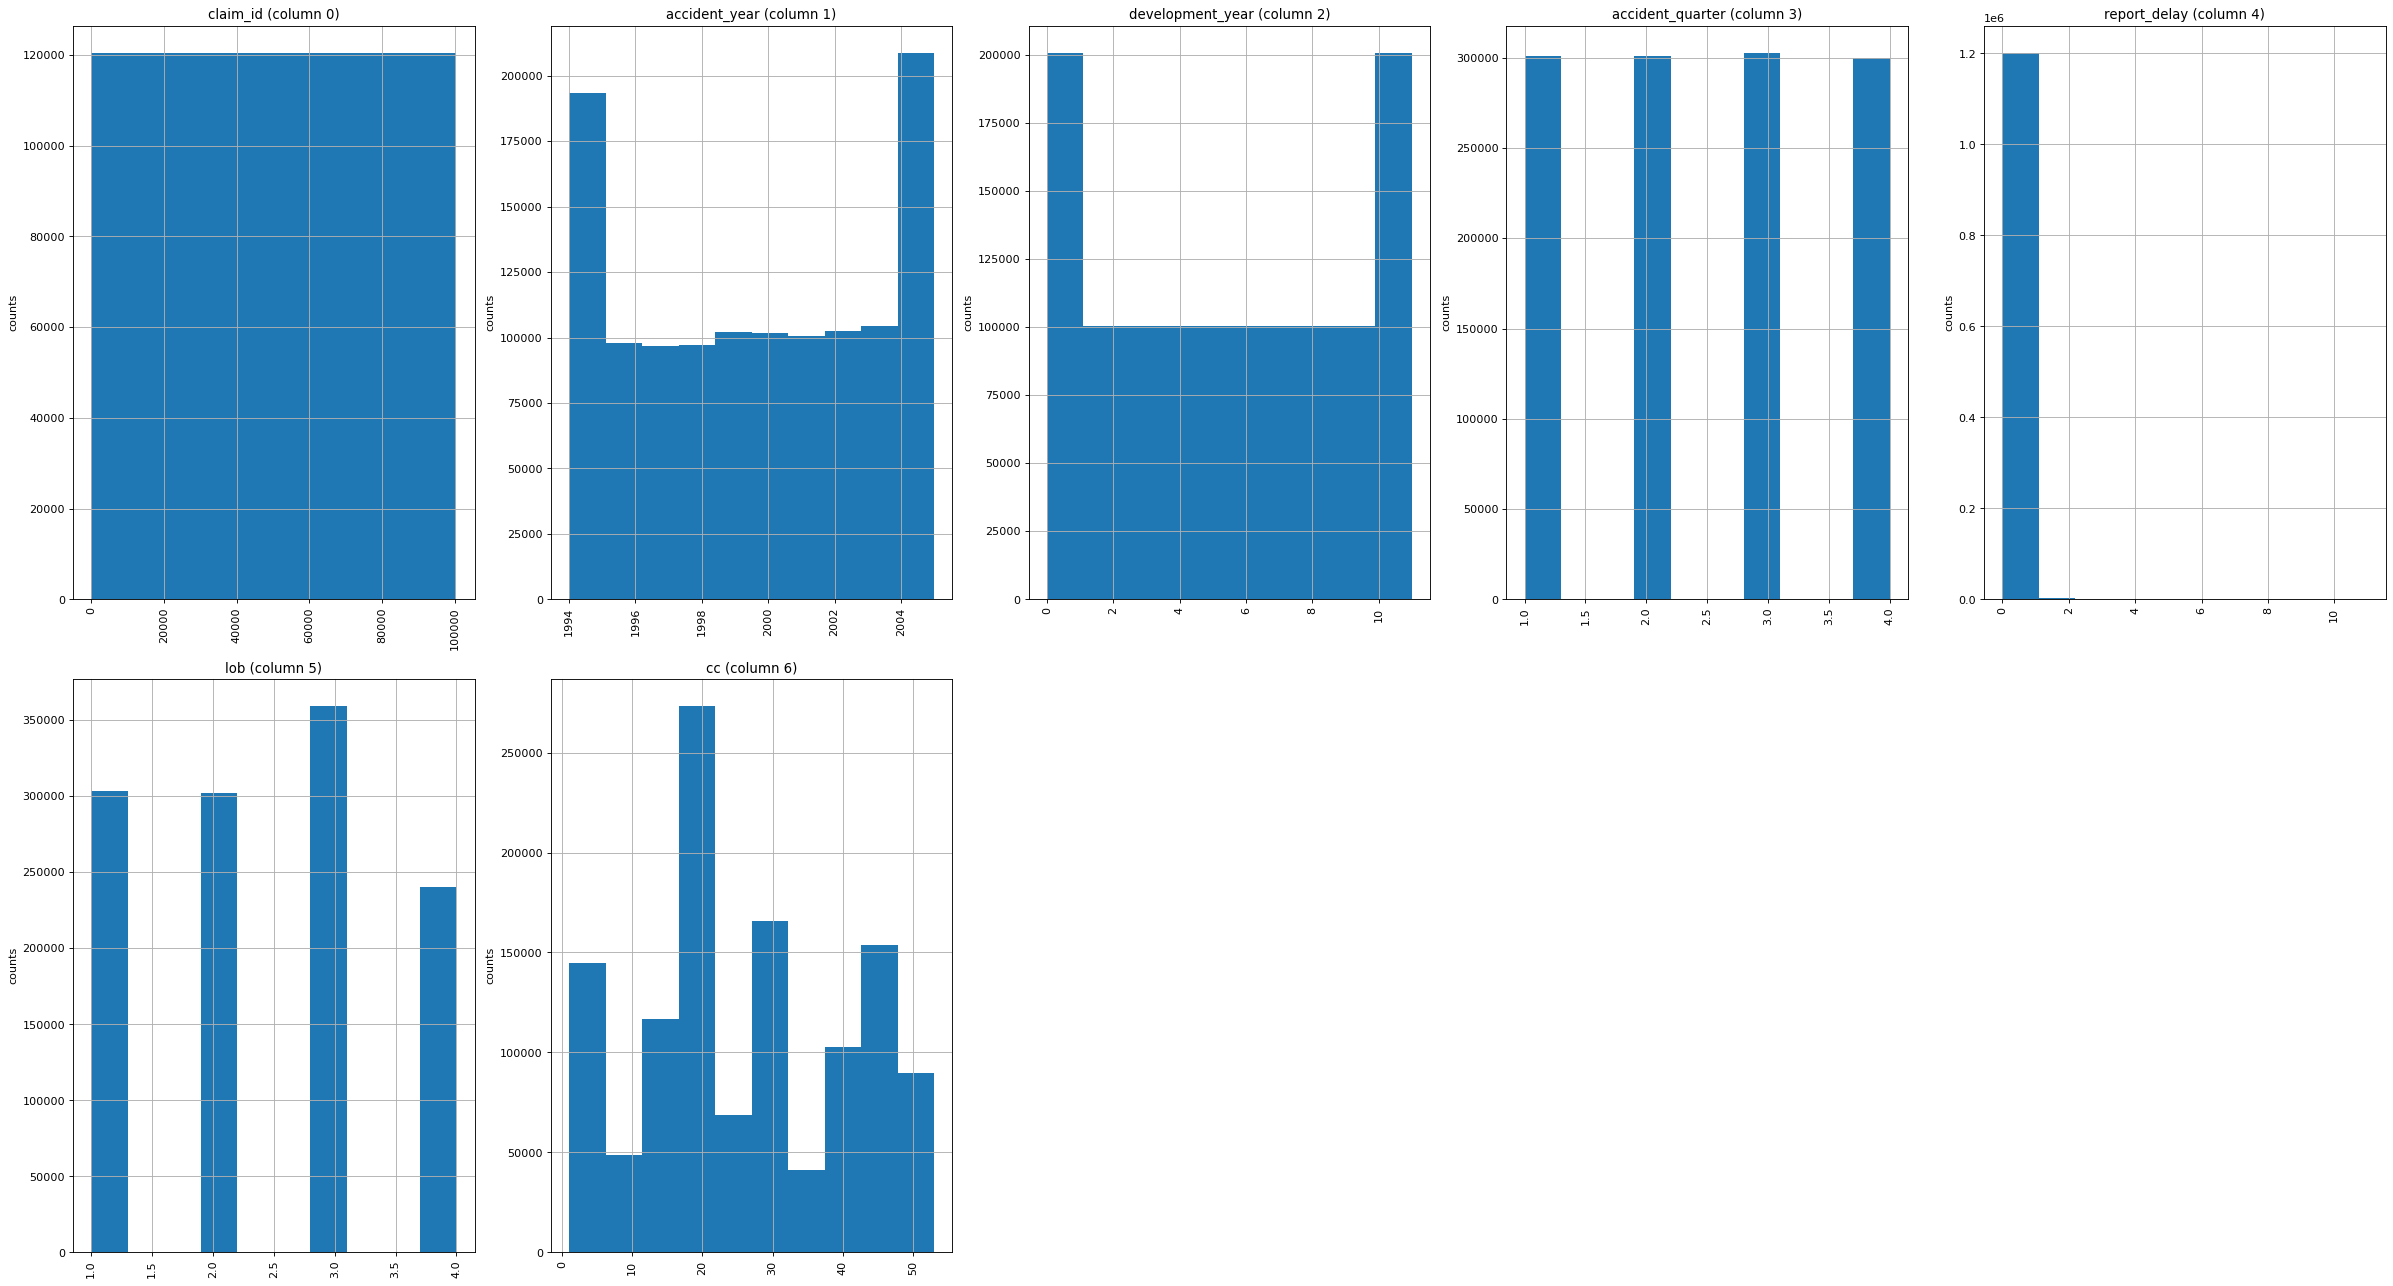

In [ ]:
# Value Distribtuion
plotPerColumnDistribution(df, 7, 5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_25732\3724479257.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


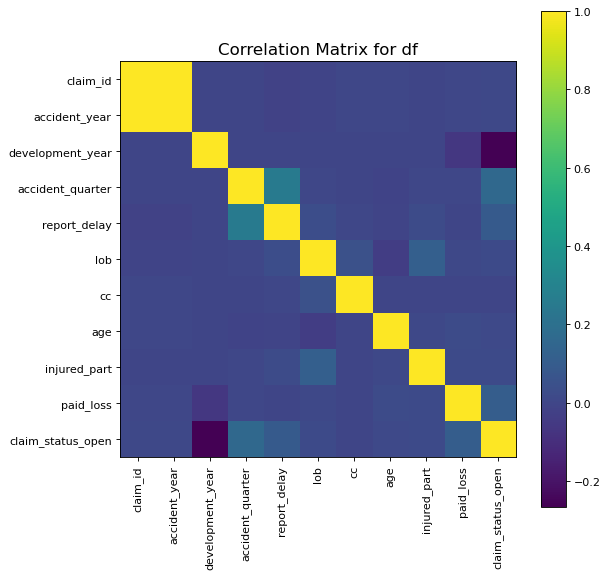

In [ ]:
plotCorrelationMatrix(df, 8, 'df')

## Data Preprocessing

In [ ]:
# Drop Column unique id identifier
df = df.drop(columns=['claim_id'])

In [ ]:
# Data Transformation

categorical_cols = ["accident_year", "development_year", "lob", "cc", "injured_part"]

for col in categorical_cols:
    df[col] = df[col].astype('float32')

## Data Splitting (Training,Testing)

In [ ]:
# Manual Data Splitting (Perbandingan Training : Testing = 2:1)

# Sorting Value
df.sort_values(by=['lob', 'accident_year'], inplace=True)

# 'split' column with values [1, 2,3] repeated
df['split'] = [1, 2, 3] * (len(df) // 3)

# Training Set (1,3)
df_train = df[df['split'].isin([1, 3])]


# Testing set
df_test = df[df['split'] == 2]


# Drop 'split' column
df = df.iloc[:, :-1]
df_train = df_train.iloc[:, :-1]
df_test = df_test.iloc[:, :-1]

# Reset Index
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)


X = df.drop(columns = ['paid_loss'])

# Separate X and y for training and testing
X_train = df_train.drop(columns=['paid_loss'])
y_train = df_train['paid_loss']

X_test = df_test.drop(columns=['paid_loss'])
y_test = df_test['paid_loss']

In [ ]:
df_test

,accident_year,development_year,accident_quarter,report_delay,lob,cc,age,injured_part,paid_loss,claim_status_open,test
0,1994.0,1.0,1,0,1.0,52.0,56,13.0,0,0,2
1,1994.0,4.0,1,0,1.0,52.0,56,13.0,0,0,1
2,1994.0,7.0,1,0,1.0,52.0,56,13.0,0,0,2
3,1994.0,10.0,1,0,1.0,52.0,56,13.0,0,0,1
4,1994.0,1.0,4,0,1.0,18.0,42,41.0,290,0,2
...,...,...,...,...,...,...,...,...,...,...,...
401635,2005.0,10.0,2,0,4.0,45.0,33,65.0,0,0,1
401636,2005.0,1.0,2,0,4.0,6.0,40,30.0,0,1,2
401637,2005.0,4.0,2,0,4.0,6.0,40,30.0,1943,1,1
401638,2005.0,7.0,2,0,4.0,6.0,40,30.0,0,0,2


In [ ]:
df_train

,accident_year,development_year,accident_quarter,report_delay,lob,cc,age,injured_part,paid_loss,claim_status_open,test
0,1994.0,0.0,1,0,1.0,52.0,56,13.0,232,1,1
1,1994.0,2.0,1,0,1.0,52.0,56,13.0,0,0,1
2,1994.0,3.0,1,0,1.0,52.0,56,13.0,0,0,2
3,1994.0,5.0,1,0,1.0,52.0,56,13.0,0,0,2
4,1994.0,6.0,1,0,1.0,52.0,56,13.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
803275,2005.0,5.0,2,0,4.0,6.0,40,30.0,0,0,2
803276,2005.0,6.0,2,0,4.0,6.0,40,30.0,0,0,1
803277,2005.0,8.0,2,0,4.0,6.0,40,30.0,0,0,1
803278,2005.0,9.0,2,0,4.0,6.0,40,30.0,0,0,2


## Model Building

In [ ]:
# Embedding Dimension
embedding_dim = 1


# Define input layers for categorical variables
input_layers = []
embeddings = []
intercept_ODP_train = np.array([0.5])

categorical_cols = ['accident_year', 'development_year', 'lob', 'cc', 'injured_part']


# Loop over categorical columns
for col in categorical_cols:

    max_value = df[col].max()
    num_max = int(max_value) + 1

    #Input Layer category
    input_layer = Input(shape=(1,), dtype='float32', name=col)
    input_layers.append(input_layer)

    # Embedding layer
    embedding = Embedding(
        input_dim=num_max,
        output_dim=embedding_dim,
        trainable=False,
        input_length=1,
        embeddings_initializer=Constant(np.random.randn(num_max, embedding_dim))
    )(input_layer)

    flatten = Flatten(name=f'{col}_flat')(embedding)
    embeddings.append(flatten)

# Input Layer numeric
numeric_cols = ['accident_quarter', 'report_delay', 'age', 'claim_status_open']
for col in numeric_cols:
    input_layer = Input(shape=(1,), dtype='float32', name=col)
    input_layers.append(input_layer)

# Concatenate embedding and numeric layers
all_inputs = Concatenate()(input_layers)
all_embeddings = Concatenate()(embeddings)

# Neural Network Model
NN0 = Dense(units=20, activation='tanh', name='hidden1')(all_embeddings)
NN0 = Dropout(0.1, name='dropout1')(NN0)
NN0 = Dense(units=15, activation='tanh', name='hidden2')(NN0)
NN0 = Dropout(0.1, name='dropout2')(NN0)
NN0 = Dense(units=10, activation='tanh', name='hidden3')(NN0)
NN0 = Dropout(0.1, name='dropout3')(NN0)

# bCCNN model using  skip connection
concate1 = Concatenate(name='concate1')([all_inputs, NN0])
Response = Dense(units=1, activation='softplus', name='Response')(NN0)


# Define and compile  model
model = Model(inputs=input_layers, outputs=Response)
model.compile(optimizer=RMSprop(), loss='poisson')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 accident_year (InputLayer)  [(None, 1)]                  0         []                            
                                                                                                  
 development_year (InputLay  [(None, 1)]                  0         []                            
 er)                                                                                              
                                                                                                  
 lob (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 cc (InputLayer)             [(None, 1)]                  0         []                        

In [ ]:
# Training the model
model.fit(
    [X_train[categorical_cols[0]], X_train[categorical_cols[1]], X_train[categorical_cols[2]],
     X_train[categorical_cols[3]], X_train[categorical_cols[4]],
     X_train[numeric_cols[0]], X_train[numeric_cols[1]], X_train[numeric_cols[2]], X_train[numeric_cols[3]]],
    y_train,
    epochs=10,
    batch_size=35
)


Epoch 1/10
22951/22951 [==============================] - 30s 1ms/step - loss: -602.1220
Epoch 2/10
22951/22951 [==============================] - 29s 1ms/step - loss: -650.2950
Epoch 3/10
22951/22951 [==============================] - 29s 1ms/step - loss: -622.0302
Epoch 4/10
22951/22951 [==============================] - 29s 1ms/step - loss: -420.7048
Epoch 5/10
22951/22951 [==============================] - 29s 1ms/step - loss: -277.2239
Epoch 6/10
22951/22951 [==============================] - 28s 1ms/step - loss: -305.2043
Epoch 7/10
22951/22951 [==============================] - 28s 1ms/step - loss: -340.2716
Epoch 8/10
22951/22951 [==============================] - 29s 1ms/step - loss: -348.2173
Epoch 9/10
22951/22951 [==============================] - 28s 1ms/step - loss: -441.5575
Epoch 10/10
22951/22951 [==============================] - 29s 1ms/step - loss: -438.2448


In [ ]:
X_test_categorical = X_test[categorical_cols].values
X_test_numeric = X_test[numeric_cols].values

#Model Prediction
y_pred = model.predict(
    [X_test_categorical[:, 0], X_test_categorical[:, 1], X_test_categorical[:, 2], X_test_categorical[:, 3], X_test_categorical[:, 4],
     X_test_numeric[:, 0], X_test_numeric[:, 1], X_test_numeric[:, 2], X_test_numeric[:, 3]]
)


#Evaluation

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# R^2
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

#explained variance score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)



12552/12552 [==============================] - 12s 918us/step
Mean Absolute Error (MAE): 271.31981994846797
Root Mean Squared Error (RMSE): 3903.141872495565
R-squared (R2): -0.003875720364083124
Explained Variance Score: -0.0033032226563780576


## Interpretation

In [ ]:
df_test['paid_loss_prediction'] = y_pred


In [ ]:
# Calculate the total cash flows paid for each claim in y_test and y_pred
total_paid_loss_actual = np.sum(y_test)
total_paid_loss_predicted = np.sum(y_pred)

# Calculate the absolute difference
difference = np.abs(total_paid_loss_actual - total_paid_loss_predicted)

# Print the difference for each claim
print("Difference for Total Claim:")
print(difference)



Difference for Each Claim:
37436758.0
Average Difference: 37436758.0


In [ ]:
df_test

,accident_year,development_year,accident_quarter,report_delay,lob,cc,age,injured_part,paid_loss,claim_status_open,test,paid_loss_prediction
0,1994.0,1.0,1,0,1.0,52.0,56,13.0,0,0,2,4.187418
1,1994.0,4.0,1,0,1.0,52.0,56,13.0,0,0,1,0.000000
2,1994.0,7.0,1,0,1.0,52.0,56,13.0,0,0,2,352.748383
3,1994.0,10.0,1,0,1.0,52.0,56,13.0,0,0,1,0.000000
4,1994.0,1.0,4,0,1.0,18.0,42,41.0,290,0,2,6.593350
...,...,...,...,...,...,...,...,...,...,...,...,...
401635,2005.0,10.0,2,0,4.0,45.0,33,65.0,0,0,1,0.000000
401636,2005.0,1.0,2,0,4.0,6.0,40,30.0,0,1,2,0.000002
401637,2005.0,4.0,2,0,4.0,6.0,40,30.0,1943,1,1,0.000000
401638,2005.0,7.0,2,0,4.0,6.0,40,30.0,0,0,2,352.678864


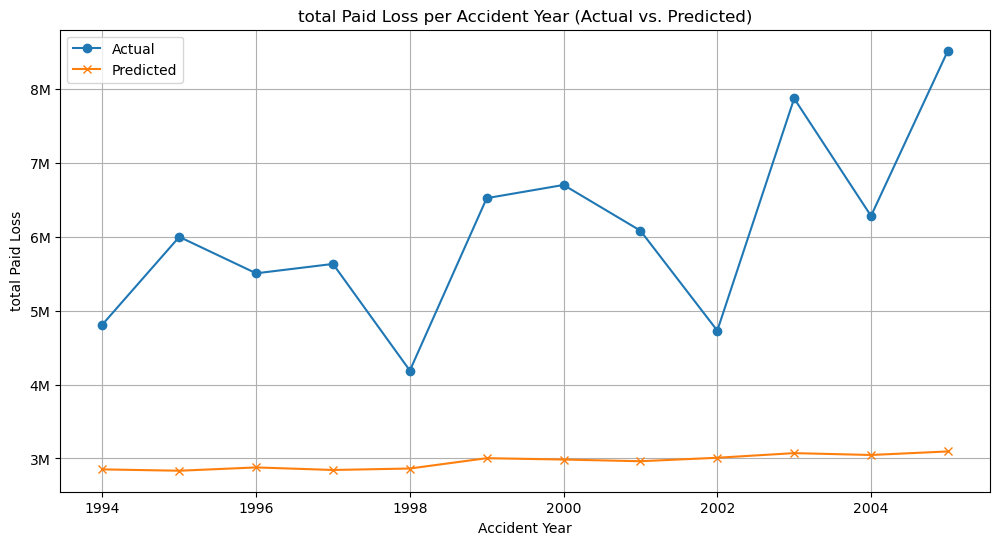

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total paid loss per accident year for y_test and y_pred
total_paid_loss_actual = df_test["paid_loss"].groupby(df_test['accident_year']).sum()
total_paid_loss_predicted = df_test["paid_loss_prediction"].groupby(df_test['accident_year']).sum()

plt.figure(figsize=(12, 6))
plt.plot(total_paid_loss_actual.index, total_paid_loss_actual.values, label='Actual', marker='o')
plt.plot(total_paid_loss_predicted.index, total_paid_loss_predicted.values, label='Predicted', marker='x')
plt.xlabel('Accident Year')
plt.ylabel('total Paid Loss')
plt.title('total Paid Loss per Accident Year (Actual vs. Predicted)')
plt.legend()
plt.grid(True)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}M".format(x / 1e6)))
plt.show()


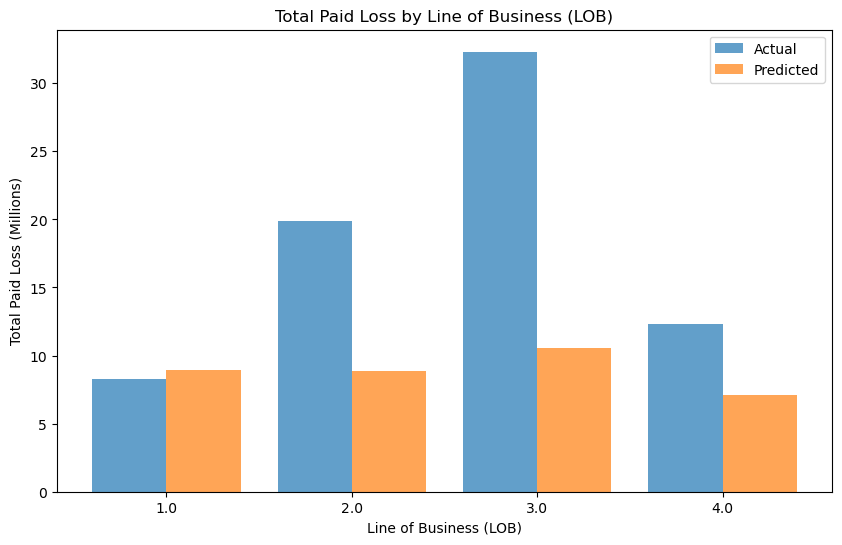

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the total paid_loss to millions
total_actual_by_lob_million = total_actual_by_lob / 1e6
total_predicted_by_lob_million = total_predicted_by_lob / 1e6

# Create a bar plot side by side for actual and predicted
width = 0.4  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar(total_actual_by_lob_million.index, total_actual_by_lob_million.values, width=width, label='Actual', alpha=0.7)
plt.bar(total_predicted_by_lob_million.index + width, total_predicted_by_lob_million.values, width=width, label='Predicted', alpha=0.7)
plt.xlabel('Line of Business (LOB)')
plt.ylabel('Total Paid Loss (Millions)')
plt.title('Total Paid Loss by Line of Business (LOB)')
plt.xticks(total_actual_by_lob_million.index + width / 2, total_actual_by_lob_million.index)
plt.legend()
plt.show()
